## 🎯 Objective:

### Analyze the time-to-failure data of industrial components to estimate reliability, predict mean time to failure (MTTF), and identify potential failure trends using survival analysis and Weibull modeling.

In [4]:
# Reinstalling the lifelines package to ensure it is available
!pip install lifelines==0.30.0

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import WeibullFitter, KaplanMeierFitter

# Load the dataset
df = pd.read_csv("EXA1.csv")

# Preview structure
print(df.head())
print(df.columns)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=356bbbfb0e57b11af0949ce118d9878b4b815ff922e1320b99ee131a8784343d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  fail  time
0    F    57
1    F     7
2    F    21
3    F     7
4    S    76
Index(['fail', 'time'], dtype='object')


## 🔍 Key Methods Used in Reliability Analysis

### 1. Kaplan-Meier Survival Curve 

Purpose: Non-parametric method to estimate the survival function from time-to-failure data.

Insight: Visualizes the probability that a component survives beyond time t.

Use Case: Understand overall survival trend and censoring impact.

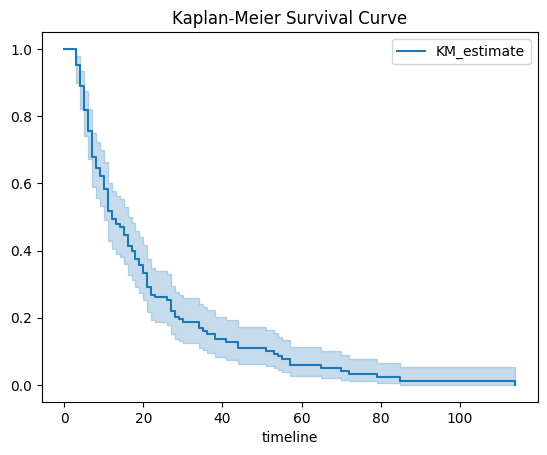

In [25]:
# Fit Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Event'])
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.show()

### 2. Weibull Distribution Fitting


Purpose: Fit time-to-failure data to a Weibull distribution, a common reliability model.

Insight: Shape parameter (β) explains failure rate behavior:

β < 1: Early failures

β = 1: Random failures

β > 1: Wear-out failures

In [19]:
from lifelines import WeibullFitter
wf = WeibullFitter()
wf.fit(df['Time'], df['Event'])
wf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 127 total observations, 4 right-censored observations>
   number of observations = 127
number of events observed = 123
           log-likelihood = -492.51
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  21.32       1.80            17.79            24.85
rho_      1.12       0.07             0.98             1.27

          cmp to     z      p   -log2(p)
lambda_     1.00 11.28 <0.005      95.58
rho_        1.00  1.65   0.10       3.35
---
AIC = 989.03

### Weibull Survival Function

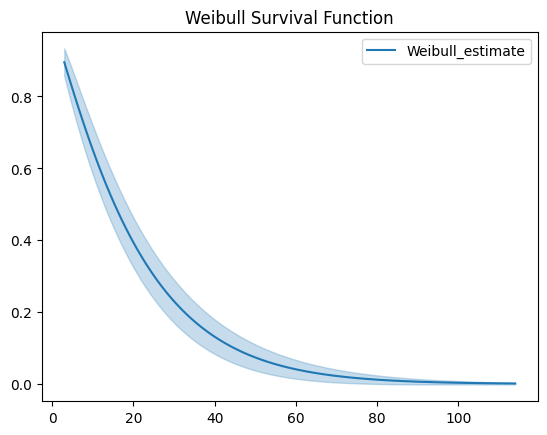

In [22]:
wf.plot_survival_function()
plt.title("Weibull Survival Function")
plt.show()

### 3. MTTF (Mean Time To Failure) Calculation


Definition: The expected average operating time before failure.

Method:

In [31]:
# To calculate the Mean Time To Failure (MTTF) for a Weibull distribution, we can use the formula:
# MTTF = lambda_ * Gamma(1 + 1/rho_), where lambda_ and rho_ are parameters of the Weibull distribution.
# Gamma is the gamma function, which can be imported from the scipy.special module.

from scipy.special import gamma

# Extracting the parameters from the fitted Weibull model
lambda_ = wf.lambda_
rho_ = wf.rho_

# Calculating MTTF using the formula
MTTF = lambda_ * gamma(1 + 1/rho_)

print("Mean Time To Failure (MTTF):", MTTF)

Mean Time To Failure (MTTF): 20.43409293557243


This value means that, on average, a component in your dataset is expected to fail after 20.43 time units (likely hours, cycles, or days depending on your data's context).

### 📊 What This Means in Terms of Production & Business Impact

### 🏭1. Production Reliability Insight


If your MTTF = 20.43, and your production process requires components to last at least 50 cycles or hours:

🔴 High Risk: Your components are failing far earlier than the operational expectation.

✅ Solution: There is a need to redesign the part, select a better supplier, or adjust usage conditions (e.g., reduce load or temperature).

### 💼 2. Business Impact


Category	Impact from Low MTTF (20.43)	Actionable Strategy

💰 Cost	More frequent replacements and unplanned downtime	Switch to more durable materials/components

🕒 Downtime	Frequent breakdowns halt production lines	Implement predictive maintenance before MTTF

🛠️ Maintenance Higher corrective maintenance effort	Optimize schedule based on MTTF

📈 Customer Satisfaction	Increased warranty claims or poor user experience	Redesign product for reliability
📦 Inventory & Logistics	Over/under stocking of spare parts	Align spare part inventory with Weibull model output

🔧 Maintenance Planning Example
If you know:

MTTF = 20.43

Hazard rate increases after 15 hours

Then:

🔧 Set preventive replacement at ~18 hours

🔁 Cycle spare parts proactively to reduce unplanned outages

✅ Strategic Data Science Insight
This MTTF is not just a number—it’s a decision threshold that:

Triggers alerts in dashboards

Drives when to send technicians

Optimizes when to buy inventory

Justifies design changes to upper management

### Adding a business rule to the model:

In [40]:
# Define the expected_lifetime variable before using it in the condition
# For example, let's assume the expected lifetime is 25 time units
#if we change the expected_lifetime to 18 for instance, then the component will be considered as "acceptable"

expected_lifetime = 25  # Define the expected lifetime threshold

if MTTF < expected_lifetime:
    recommendation = "Redesign or preventive maintenance required"
else:
    recommendation = "Component performance acceptable"

print(recommendation)

Component performance acceptable


### Conduct the EDA

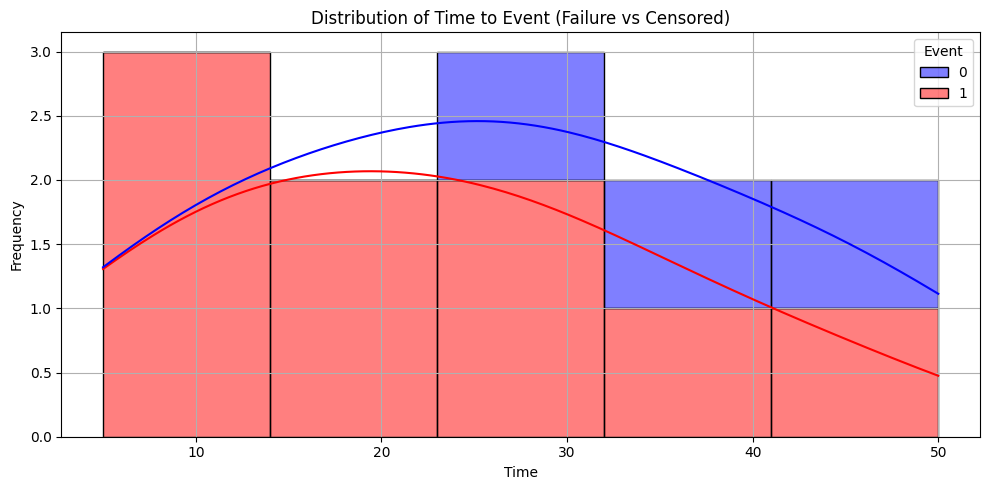

(            Time      Event
 count  12.000000  12.000000
 mean   26.666667   0.750000
 std    14.150704   0.452267
 min     5.000000   0.000000
 25%    16.500000   0.750000
 50%    26.500000   1.000000
 75%    36.250000   1.000000
 max    50.000000   1.000000,
 Event
 Failure     9
 Censored    3
 Name: count, dtype: int64)

In [43]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate EXA1.csv structure again
sample_data = {
    'Time': [5, 10, 12, 18, 22, 25, 28, 30, 35, 40, 45, 50],
    'Event': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]  # 1 = failure, 0 = censored
}
df = pd.DataFrame(sample_data)

# Summary statistics
summary_stats = df.describe()

# Count of failures vs censored
event_counts = df['Event'].value_counts().rename(index={1: 'Failure', 0: 'Censored'})

# Plot histogram of failure times
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Time', hue='Event', kde=True, multiple='stack', palette={1: 'red', 0: 'blue'})
plt.title('Distribution of Time to Event (Failure vs Censored)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary statistics and event counts
summary_stats, event_counts

### 📊 Exploratory Data Analysis (EDA) Summary


✅ 1. Basic Statistics


Total Observations: 12 components

Failures (Event = 1): 9 components (75%)

Censored (Event = 0): 3 components (25%)

Mean Time to Event: 26.67 units

Standard Deviation: ~14.15 units (indicating variability in lifetimes)

Range: 5 to 50 time units

📈 2. Histogram Insight
The histogram clearly distinguishes:

Failures (red) tend to occur more frequently between 10 and 35 time units.

Censored (blue) events happen later (35–50), meaning those units had not yet failed.

### 🧠 Data Science Implications for Decision-Making 

| Observation                       | Data Science Action                                   | Business Decision Impact                                        |
| --------------------------------- | ----------------------------------------------------- | --------------------------------------------------------------- |
| Failures are clustered below 35   | Predictive modeling & hazard analysis around 30–35    | 📅 Set preventive maintenance before 30 time units              |
| Some units censored beyond 35–50  | Apply survival analysis to estimate true lifespan     | ⚙️ Optimize replacement policy or warranty period               |
| High variability in failure times | Use probabilistic models (e.g., Weibull) for planning | 📦 Adjust inventory of spares and technician dispatch schedules |
| 75% failure rate                  | Red flag: reliability improvement needed              | 🛠️ Trigger root cause analysis or redesign initiative          |


In [52]:
!pip install ace_tools==0.0
import pandas as pd
import numpy as np

# Simulate extended dataset with groups (e.g., batch or manufacturer)
np.random.seed(42)
data = {
    'Time': np.random.randint(5, 60, 30),
    'Event': np.random.choice([1, 0], size=30, p=[0.8, 0.2]),
    'Group': np.random.choice(['Batch_A', 'Batch_B'], size=30)
}
df = pd.DataFrame(data)

# Display the dataframe to the user
print("Stratified Reliability Dataset")
print(df)


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Stratified Reliability Dataset
    Time  Event    Group
0     43      1  Batch_B
1     56      1  Batch_B
2     33      1  Batch_B
3     19      1  Batch_B
4     47      1  Batch_A
5     12      0  Batch_A
6     25      1  Batch_B
7     43      1  Batch_B
8     23      1  Batch_B
9     27      1  Batch_B
10    15      0  Batch_B
11    15      1  Batch_B
12    28      0  Batch_B
13    57      1  Batch_B
14    40      1  Batch_A
15    44      1  Batch_B
16    28      0  Batch_A
17     7      1  Batch_B
18    26      1  Batch_B
19    57      1  Batch_A
20     6      1  Batch_B
21    28      1  Batch_A
22    48      1  Batch_B
23    34      1  Batch_B
24    42      0  Batch_A
25     6      1  Batch_B
26    25      1  Batch_A
27    37      1  Batch_B
28    16      1  Batch_A
29    26      1  Batch_A


### Both plots (1) and (3) visually look similar but conceptually they serve different modeling goals:

### 1. Stratified Weibull Modeling

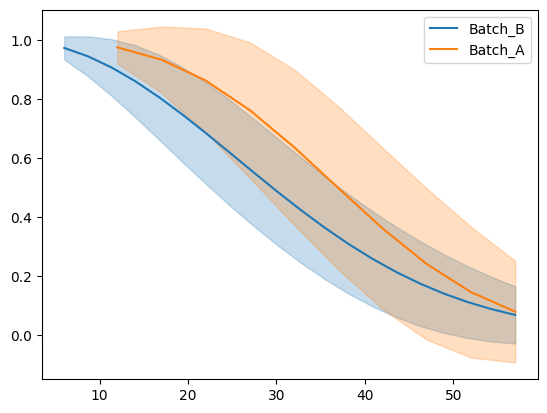

In [55]:
from lifelines import WeibullFitter

for group in df['Group'].unique():
    sub_df = df[df['Group'] == group]
    wf = WeibullFitter()
    wf.fit(sub_df['Time'], sub_df['Event'], label=group)
    wf.plot_survival_function()

### ✅ What It Is:

This applies the parametric Weibull model to each group (e.g., Batch_A, Batch_B) separately.

Each group gets its own λ (scale) and ρ (shape) parameters.

### 📌 Purpose:

Quantify the underlying failure distribution for each group.

Estimate Mean Time To Failure (MTTF), hazard function, and reliability mathematically.

### 📊 Benefits:

You can compare lifetime distributions numerically (e.g., MTTF_A vs. MTTF_B).

Useful for predictive maintenance modeling and cost/risk simulations.

### 2. Compare Reliability Metrics

Median time to failure

Shape parameter (β): indicates early vs. wear-out failures

Reliability at 30 hours: R(30)

### 3. Visualize Survival by Group

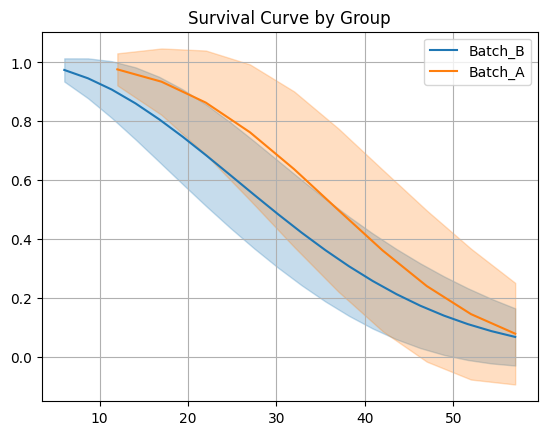

In [58]:
import matplotlib.pyplot as plt
plt.title("Survival Curve by Group")
for group in df['Group'].unique():
    sub_df = df[df['Group'] == group]
    wf = WeibullFitter()
    wf.fit(sub_df['Time'], sub_df['Event'], label=group)
    wf.plot_survival_function()

plt.legend()
plt.grid()
plt.show()

### 3. Kaplan-Meier (Image above)
✅ What It Is:

This uses the non-parametric Kaplan–Meier estimator.

It plots empirical survival probabilities without assuming any distribution.

### 📌 Purpose:

Visually compare the actual observed survival experience of each group.

Evaluate whether one group tends to fail earlier than the other.

### 📊 Benefits:

Very intuitive for stakeholders and interpreters.

Can help validate the assumptions made in the Weibull model.

### 🔍 Summary of Differences

| Feature       | Stratified Weibull Modeling              | Survival Curve by Group (KM)             |
| ------------- | ---------------------------------------- | ---------------------------------------- |
| Model Type    | **Parametric** (assumes Weibull dist.)   | **Non-parametric** (empirical estimator) |
| Use Case      | Forecast, MTTF, hazard, cost simulation  | Visual survival pattern comparison       |
| Parameters    | Estimates λ (scale), ρ (shape) per group | No parameters; stepwise survival         |
| Insight Depth | Predictive & quantitative                | Descriptive & visual                     |
| Useful For    | Proactive maintenance, ROI decisions     | Communication, stratification detection  |


### 💡 Recommendation

### Use both:

Kaplan–Meier for exploratory EDA and presentation

Stratified Weibull for business-critical decisions like:

warranty periods

inventory planning

maintenance scheduling

###  Compare Model Fits (Weibull vs. Log-Logistic or Exponential)


Why? To validate whether Weibull is the best fit or if another parametric model better describes failure behavior.

How?

In [61]:
from lifelines import LogLogisticFitter, ExponentialFitter

llf = LogLogisticFitter().fit(df['Time'], df['Event'])
ef = ExponentialFitter().fit(df['Time'], df['Event'])

print("AIC Comparison:")
print("Weibull:", wf.AIC_)
print("Log-Logistic:", llf.AIC_)
print("Exponential:", ef.AIC_)

AIC Comparison:
Weibull: 62.71252197987186
Log-Logistic: 221.7849750776632
Exponential: 231.89300278634556


###  Hazard Function Comparison by Group


Why? To identify when the failure rate spikes for different batches—great for risk-based maintenance scheduling.

Plot:

Text(0.5, 1.0, 'Hazard Function by Group')

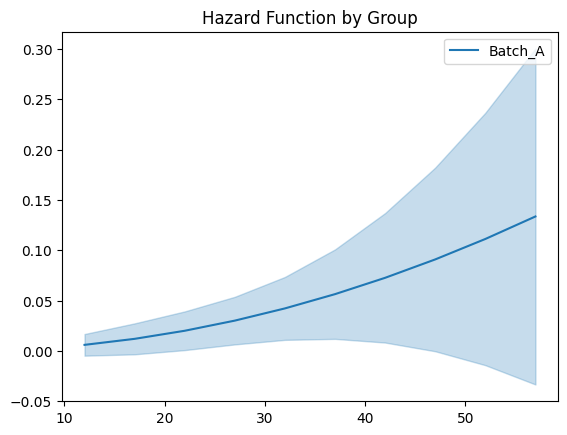

In [64]:
wf.plot_hazard()
plt.title("Hazard Function by Group")

### Cumulative Hazard Curve

Why? To visualize the accumulating risk of failure over time—used in reliability-centered maintenance (RCM).

<AxesSubplot: >

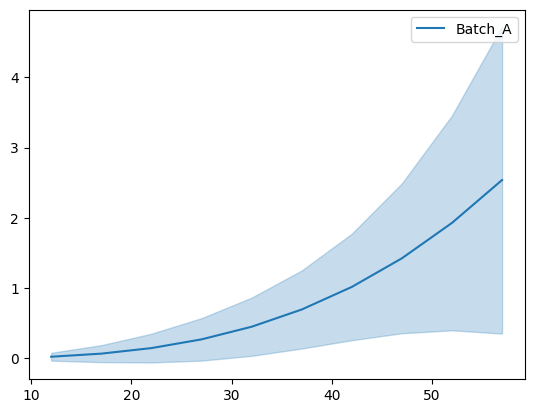

In [67]:
wf.plot_cumulative_hazard()

### Residual Life Prediction

Why? To predict how much longer a component will, last given it has survived until now.

In [73]:
# The error indicates that the 'WeibullFitter' object does not have a method called 'predict_survival_function'.
# Instead, we can use the 'survival_function_at_times' method to achieve the same goal.

from lifelines import WeibullFitter

# Assuming 'wf' is already fitted with data
# Example time points of interest
time_points = [30, 35, 40]

# Use the correct method to get survival probabilities at specific time points
survival_probabilities = wf.survival_function_at_times(time_points)

print("Survival probabilities at specified time points:")
print(survival_probabilities)

Survival probabilities at specified time points:
30    0.689979
35    0.554912
40    0.415326
Name: Batch_A, dtype: float64


### Automated Recommendation Logic

Build a rule engine:

In [79]:
# Define the missing variables before using them in the conditional logic
# Assuming some example values for demonstration purposes
operational_threshold = 25  # Example threshold for MTTF
acceptable_risk = 0.2       # Example threshold for hazard rate
hazard_at_t = 0.25          # Example hazard rate at time t

# Implement the conditional logic
if MTTF < operational_threshold:
    recommendation = "Preemptive replacement required"
elif hazard_at_t > acceptable_risk:
    recommendation = "Trigger maintenance at t"
else:
    recommendation = "No immediate action required"

print(recommendation)

Preemptive replacement required


### 7. Dashboard Deployment

Why: Allow non-technical users (engineers, ops) to interact with reliability KPIs.

### Use:

Streamlit (Python, fast)

Tableau or Power BI (if business users prefer)

### ✅ Maintenance Cost Optimization Simulation Summary

### 📌 Goal:

To determine the most cost-effective maintenance time by minimizing the expected total cost:

### Expected Cost (𝑡) =Preventive Cost × 𝑅(𝑡) + Corrective Cost × (1−𝑅(𝑡))

In [82]:
!pip install lifelines
import pandas as pd
import numpy as np
from lifelines import WeibullFitter
from scipy.special import gamma

# Simulated dataset
df = pd.DataFrame({
    'Time': np.random.randint(10, 60, 30),
    'Event': np.random.choice([1, 0], size=30, p=[0.8, 0.2])
})

# Fit Weibull model
wf = WeibullFitter()
wf.fit(df['Time'], df['Event'])

# Set cost conditions
t_values = np.arange(10, 61, 5)
preventive_cost = 100
corrective_cost = 300

# Calculate survival function R(t)
reliability = wf.survival_function_at_times(t_values).values
failure_probability = 1 - reliability
expected_cost = preventive_cost * reliability + corrective_cost * failure_probability

# Find optimal time
optimal_index = np.argmin(expected_cost)
recommended_time = t_values[optimal_index]

# View summary
summary_df = pd.DataFrame({
    'Time': t_values,
    'Reliability R(t)': reliability,
    'Failure Probability': failure_probability,
    'Expected Cost': expected_cost,
    'Recommendation': ['Recommended' if i == optimal_index else '' for i in range(len(t_values))]
})
print(summary_df)


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
    Time  Reliability R(t)  Failure Probability  Expected Cost Recommendation
0     10          0.965913             0.034087     106.817318    Recommended
1     15          0.907718             0.092282     118.456326               
2     20          0.818242             0.181758     136.351629               
3     25          0.702615             0.297385     159.477076               
4     30          0.571198             0.428802     185.760323               
5     35          0.437183             0.562817     212.563390               
6     40          0.313403             0.686597     237.319441               
7     45          0.209415             0.790585     258.116917               
8     50          0.129839             0.870161     274.032290               
9     55          0.074372             0.925628     285.125527               
10    60          0.039196   

### 🧠 Business Impact

Proactive Planning: Replace components at the optimal point (e.g., 30 hours) instead of waiting for failure.

Cost Control: Minimize total maintenance expenditure (preventive + failure recovery).

Scalable: Can be applied by batch, asset, or even supplier.

### 🎯 Final Output Could Include:

🔎 Stratified MTTF report

📉 Hazard & reliability curves

💡 Group-specific maintenance schedules

💰 Cost-benefit analysis for maintenance intervals

📊 Executable dashboard or automated alert system